# Data Acquisition

False


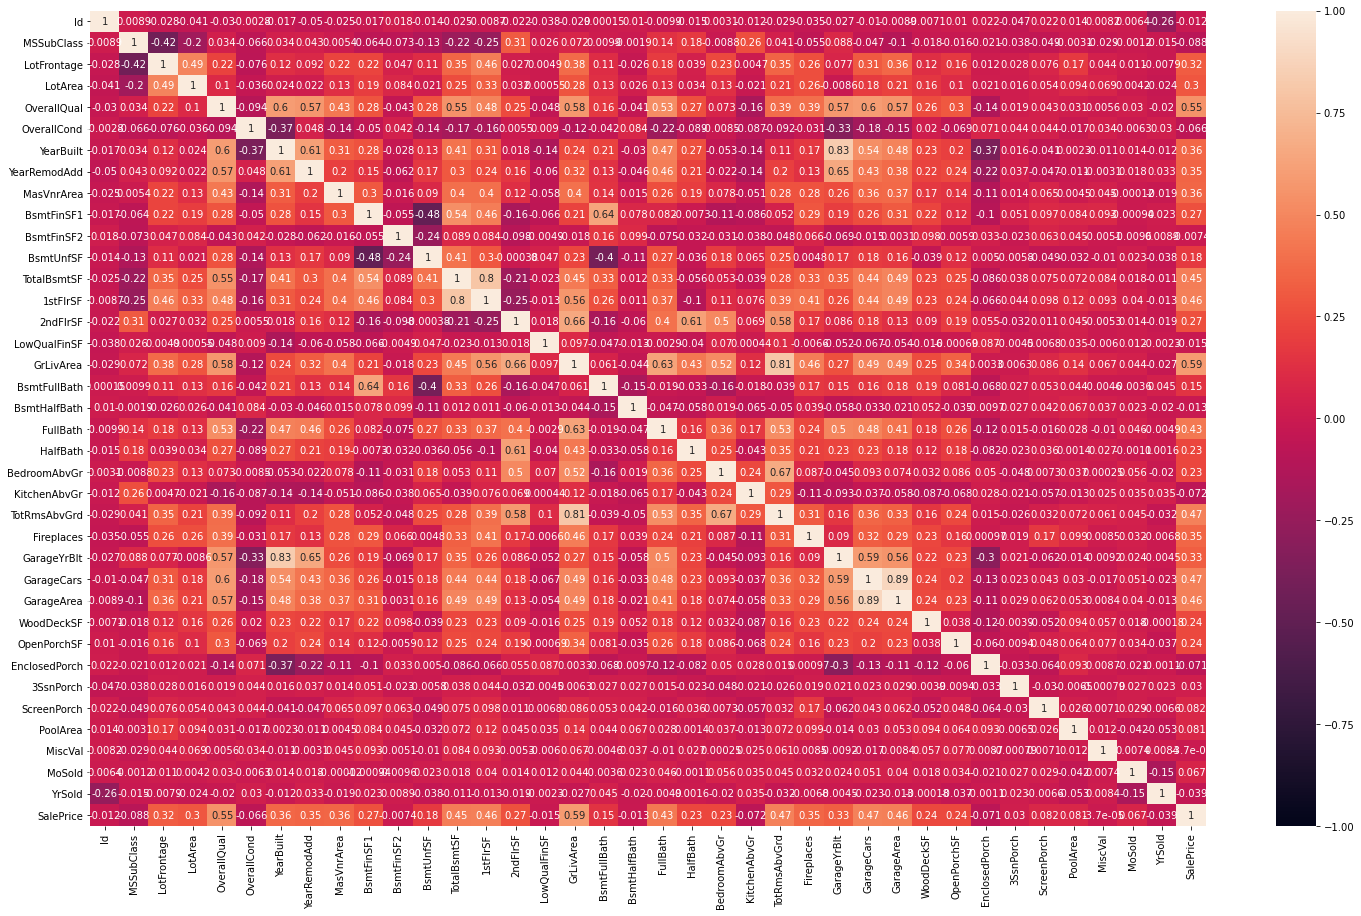

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df1 = pd.read_csv('test.csv', na_values = ['n/a', '\s+', "N/A"])
df2 = pd.read_csv('train.csv', na_values = ['n/a', '\s+', "N/A"])

print(df1.equals(df2))
df1.shape

#df1.head()

result = [df1, df2]
df = pd.concat(result, ignore_index=True) 
#print (df)
df.shape  
cor = df.corr()

plt.subplots(figsize=(25,15))
#sns.heatmap(df.corr())
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap


In [2]:
df.shape

(2919, 81)

# Data preparation


In [3]:
pd.options.display.max_rows = 10000
#pd.set_option('display.expand_frame_repr', False)

#1Duplicates
print(df.duplicated().sum())
df= df.drop('Id', axis=1).drop_duplicates() 
print(df.duplicated().sum())  
#print(df[df.duplicated(keep = "first") == True])  #diplaying duplicates
#print(df[df.duplicated(keep = "last") == True])
df = df.loc[:,~df.columns.duplicated()]
#df


0
0


In [4]:
#2Irregularities
df["MSZoning"] = df['MSZoning'].replace(to_replace= "C (all)", value = "C") #replacing C (all) with C which is commercial
df = df.rename(columns=lambda x: x.strip())
df.shape
#df.head()

(2919, 80)

34
2919


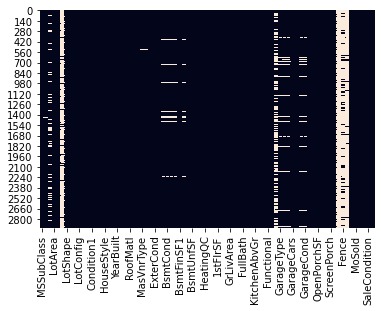

In [5]:
#3Missing values
sns.heatmap(df.isnull(), cbar=False)

print(df.isnull().any().sum())                            # rechecking number of column having missing values 
print(df.isnull().any(axis = 1).sum())                     # rechecking number of rows having missing values

In [6]:

for col in df.columns:                                          #getting percentage of missing values in columns
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col, round(pct_missing*100)))


    
cols = df.columns[df.isnull().mean()>0.7]       #displaying columns with more than 70% missing values
df = df.drop(cols, axis=1)                     #dropping features with values missing more than 70%


##Missing values(numerical)
df=df.fillna(df.mean())        #filling numerical values with the mean
df.isna().sum()           #displaying columns with missing values

df['MSZoning'] = df.groupby('Street')['MSZoning'].apply(lambda x: x.fillna(x.value_counts().idxmax() if x.value_counts().max() >=1 else mode , inplace = False)) #filling missing values of MSZoning based on most frequent value in streets 
df['Utilities'] = df.groupby('LotShape')['Utilities'].apply(lambda x: x.fillna(x.value_counts().idxmax() if x.value_counts().max() >=1 else mode , inplace = False)) #filling missing values of Utilities on most frequent value in LotShape 
df['Exterior1st'] = df.groupby('Utilities')['Exterior1st'].apply(lambda x: x.fillna(x.value_counts().idxmax() if x.value_counts().max() >=1 else mode , inplace = False)) #filling missing values of Exterior1st on most frequent value in Utilities
df['Exterior2nd'] = df.groupby('Exterior1st')['Exterior2nd'].apply(lambda x: x.fillna(x.value_counts().idxmax() if x.value_counts().max() >=1 else mode , inplace = False)) #filling missing values of Exterior2nd on most frequent value in Exterior1st
df['MasVnrType'] = df.groupby('RoofMatl')['MasVnrType'].apply(lambda x: x.fillna(x.value_counts().idxmax() if x.value_counts().max() >=1 else mode , inplace = False)) #filling missing values of Exterior2nd on most frequent value in Exterior1st
df['BsmtQual'] = df.groupby('BldgType')['BsmtQual'].apply(lambda x: x.fillna(x.value_counts().idxmax() if x.value_counts().max() >=1 else mode , inplace = False)) #filling missing values of bsmtqual on most frequent value in BldgType
df['BsmtCond'] = df.groupby('BsmtQual')['BsmtCond'].apply(lambda x: x.fillna(x.value_counts().idxmax() if x.value_counts().max() >=1 else mode , inplace = False)) #filling missing values of BsmtCond on most frequent value in BsmtQual
df['BsmtExposure'] = df.groupby('BsmtCond')['BsmtExposure'].apply(lambda x: x.fillna(x.value_counts().idxmax() if x.value_counts().max() >=1 else mode , inplace = False)) #filling missing values of BsmtExposure on most frequent value in BsmtCond
df['BsmtFinType1'] = df.groupby('BsmtCond')['BsmtFinType1'].apply(lambda x: x.fillna(x.value_counts().idxmax() if x.value_counts().max() >=1 else mode , inplace = False)) #filling missing values of BsmtFinType1 on most frequent value in BsmtCond
df['BsmtFinType2'] = df.groupby('BsmtFinType1')['BsmtFinType2'].apply(lambda x: x.fillna(x.value_counts().idxmax() if x.value_counts().max() >=1 else mode , inplace = False)) #filling missing values of BsmtFinType2 on most frequent value in BsmtFinType1
df['Electrical'] = df.groupby('Utilities')['Electrical'].apply(lambda x: x.fillna(x.value_counts().idxmax() if x.value_counts().max() >=1 else mode , inplace = False)) #filling missing values of Electrical on most frequent value in Utilities
df['KitchenQual'] = df.groupby('BsmtQual')['KitchenQual'].apply(lambda x: x.fillna(x.value_counts().idxmax() if x.value_counts().max() >=1 else mode , inplace = False)) #filling missing values of kitchenQual on most frequent value in BsmtQual
df['Functional'] = df.groupby('Utilities')['Functional'].apply(lambda x: x.fillna(x.value_counts().idxmax() if x.value_counts().max() >=1 else mode , inplace = False)) #filling missing values of Functional on most frequent value in Utilities
df['FireplaceQu'] = df.groupby('KitchenQual')['FireplaceQu'].apply(lambda x: x.fillna(x.value_counts().idxmax() if x.value_counts().max() >=1 else mode , inplace = False)) #filling missing values of FireplaceQual on most frequent value in KitchenQual
df['GarageType'] = df.groupby('Street')['GarageType'].apply(lambda x: x.fillna(x.value_counts().idxmax() if x.value_counts().max() >=1 else mode , inplace = False)) #filling missing values of GarageType on most frequent value in Street
df['GarageFinish'] = df.groupby('GarageType')['GarageFinish'].apply(lambda x: x.fillna(x.value_counts().idxmax() if x.value_counts().max() >=1 else mode , inplace = False)) #filling missing values of GarageFinish on most frequent value in GarageType
df['GarageQual'] = df.groupby('GarageFinish')['GarageQual'].apply(lambda x: x.fillna(x.value_counts().idxmax() if x.value_counts().max() >=1 else mode , inplace = False)) #filling missing values of GarageQual on most frequent value in GarageFinish
df['GarageCond'] = df.groupby('GarageQual')['GarageCond'].apply(lambda x: x.fillna(x.value_counts().idxmax() if x.value_counts().max() >=1 else mode , inplace = False)) #filling missing values of GarageCond on most frequent value in GarageQual
df['SaleType'] = df.groupby('SaleCondition')['SaleType'].apply(lambda x: x.fillna(x.value_counts().idxmax() if x.value_counts().max() >=1 else mode , inplace = False)) #filling missing values of SaleType on most frequent value in SaleCondition
#df.isna().sum()  


 


MSSubClass-0.0%
MSZoning-0.0%
LotFrontage-17.0%
LotArea-0.0%
Street-0.0%
Alley-93.0%
LotShape-0.0%
LandContour-0.0%
Utilities-0.0%
LotConfig-0.0%
LandSlope-0.0%
Neighborhood-0.0%
Condition1-0.0%
Condition2-0.0%
BldgType-0.0%
HouseStyle-0.0%
OverallQual-0.0%
OverallCond-0.0%
YearBuilt-0.0%
YearRemodAdd-0.0%
RoofStyle-0.0%
RoofMatl-0.0%
Exterior1st-0.0%
Exterior2nd-0.0%
MasVnrType-1.0%
MasVnrArea-1.0%
ExterQual-0.0%
ExterCond-0.0%
Foundation-0.0%
BsmtQual-3.0%
BsmtCond-3.0%
BsmtExposure-3.0%
BsmtFinType1-3.0%
BsmtFinSF1-0.0%
BsmtFinType2-3.0%
BsmtFinSF2-0.0%
BsmtUnfSF-0.0%
TotalBsmtSF-0.0%
Heating-0.0%
HeatingQC-0.0%
CentralAir-0.0%
Electrical-0.0%
1stFlrSF-0.0%
2ndFlrSF-0.0%
LowQualFinSF-0.0%
GrLivArea-0.0%
BsmtFullBath-0.0%
BsmtHalfBath-0.0%
FullBath-0.0%
HalfBath-0.0%
BedroomAbvGr-0.0%
KitchenAbvGr-0.0%
KitchenQual-0.0%
TotRmsAbvGrd-0.0%
Functional-0.0%
Fireplaces-0.0%
FireplaceQu-49.0%
GarageType-5.0%
GarageYrBlt-5.0%
GarageFinish-5.0%
GarageCars-0.0%
GarageArea-0.0%
GarageQual-5.0%


In [7]:
print(df.isnull().any().sum())                            # number of column having missing values
print(df.isnull().any(axis = 1).sum())                     #number of rows having missing values

0
0


count    2557.000000
mean       68.204778
std        12.383960
min        36.000000
25%        60.000000
50%        69.305795
75%        75.000000
max        99.000000
Name: LotFrontage, dtype: float64

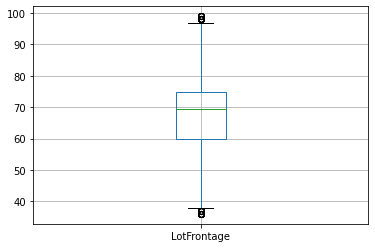

In [8]:
#4 Outliers
#LotFrontage
#df["LotFrontage"].describe()
LFM = df[ (df['LotFrontage'] >= 100)].index  # considering values above 100 as an outlier 
df.drop(LFM , inplace=True)

LFL = df[ (df['LotFrontage'] <= 35)].index  # considering values below 35 as an outlier 
df.drop(LFL , inplace=True)

df.boxplot(column=['LotFrontage']) 
df["LotFrontage"].describe() 

count     2419.000000
mean      9233.742869
std       2612.203063
min       2117.000000
25%       7584.500000
50%       9216.000000
75%      10876.000000
max      15957.000000
Name: LotArea, dtype: float64

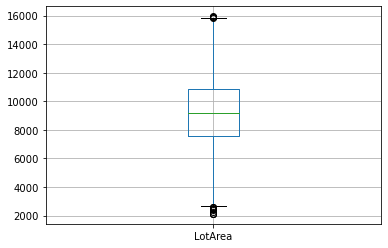

In [9]:
#LotArea
LAM = df[ (df['LotArea'] >= 16000)].index  # considering values above 16000 as an outlier 
df.drop(LAM , inplace=True)

LAL = df[ (df['LotArea'] <= 2000)].index  # considering values above 2000 as an outlier 
df.drop(LAL , inplace=True)

df.boxplot(column=['LotArea']) 
df["LotArea"].describe() 

count    1492.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: MasVnrArea, dtype: float64

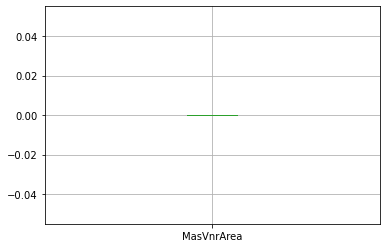

In [10]:
#MasVnrArea
MA = df[ (df['MasVnrArea'] >= 1)].index  # considering values above 400 as an outlier 
df.drop(MA , inplace=True)

df.boxplot(column=['MasVnrArea']) 
df["MasVnrArea"].describe() 

count    1488.000000
mean      326.896118
std       356.548793
min         0.000000
25%         0.000000
50%       245.000000
75%       600.000000
max      1470.000000
Name: BsmtFinSF1, dtype: float64

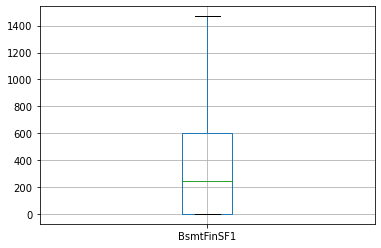

In [11]:
#BsmtFinSF1
bf1 = df[ (df['BsmtFinSF1'] >= 1500)].index  # considering values above 1500 as an outlier 
df.drop(bf1 , inplace=True)

df.boxplot(column=['BsmtFinSF1']) 
df["BsmtFinSF1"].describe() 

count    1305.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: BsmtFinSF2, dtype: float64

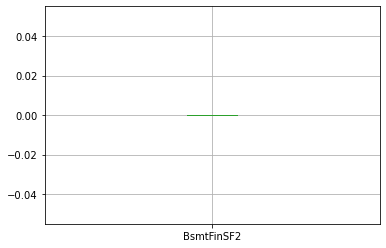

In [12]:
#BsmtFinSF2
bf2 = df[ (df['BsmtFinSF2'] >= 1)].index  # considering values above 1 as an outlier 
df.drop(bf2 , inplace=True)

df.boxplot(column=['BsmtFinSF2']) 
df["BsmtFinSF2"].describe() 

count    1305.000000
mean      347.464368
std       393.589345
min         0.000000
25%         0.000000
50%         0.000000
75%       689.000000
max      1788.000000
Name: 2ndFlrSF, dtype: float64

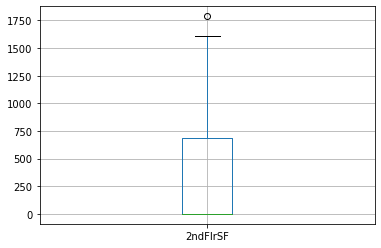

In [13]:
df.boxplot(column=['2ndFlrSF']) 
df["2ndFlrSF"].describe() 

count    1276.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: LowQualFinSF, dtype: float64

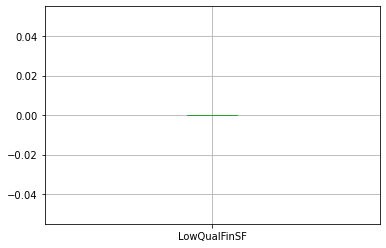

In [14]:
LQF = df[ (df['LowQualFinSF'] >= 50)].index  # considering values above 50 as an outlier 
df.drop(LQF , inplace=True)

df.boxplot(column=['LowQualFinSF']) 
df["LowQualFinSF"].describe() 

count    1256.000000
mean     1343.468153
std       388.787756
min       334.000000
25%      1040.000000
50%      1324.000000
75%      1611.250000
max      2495.000000
Name: GrLivArea, dtype: float64

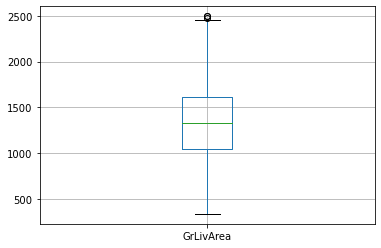

In [15]:
ra = df[ (df['GrLivArea'] >= 2500)].index  # considering values above 2500 as an outlier 
df.drop(ra , inplace=True)

df.boxplot(column=['GrLivArea']) 
df["GrLivArea"].describe() 

count    1256.000000
mean     1970.900856
std        26.986535
min      1895.000000
25%      1952.000000
50%      1977.000000
75%      1996.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

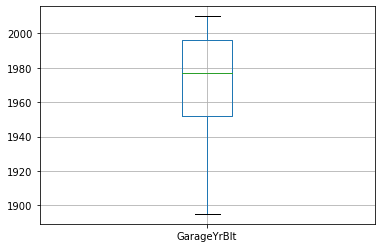

In [16]:
df.boxplot(column=['GarageYrBlt']) 
df["GarageYrBlt"].describe() 

count    1155.000000
mean       43.440693
std        70.746470
min         0.000000
25%         0.000000
50%         0.000000
75%        96.000000
max       248.000000
Name: WoodDeckSF, dtype: float64

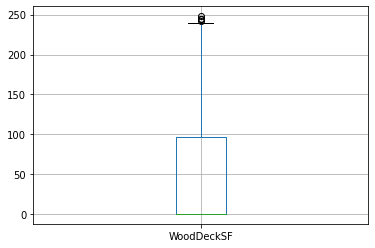

In [17]:
wd = df[ (df['WoodDeckSF'] >= 250)].index  # considering values above 250 as an outlier 
df.drop(wd , inplace=True)

df.boxplot(column=['WoodDeckSF']) 
df["WoodDeckSF"].describe() 

count    981.000000
mean      16.173293
std       25.135359
min        0.000000
25%        0.000000
50%        0.000000
75%       33.000000
max       90.000000
Name: OpenPorchSF, dtype: float64

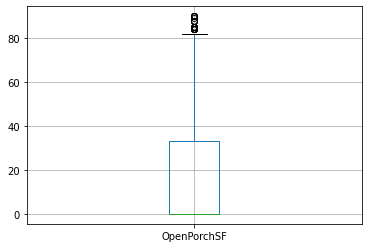

In [18]:
op = df[ (df['OpenPorchSF'] > 90)].index  # considering values above 90 as an outlier 
df.drop(op , inplace=True)


df.boxplot(column=['OpenPorchSF']) 
df["OpenPorchSF"].describe() 

count    728.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: EnclosedPorch, dtype: float64

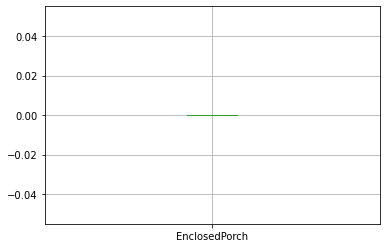

In [19]:
ep = df[ (df['EnclosedPorch'] >= 20)].index  # considering values above 20 as an outlier 
df.drop(ep , inplace=True)


df.boxplot(column=['EnclosedPorch']) 
df["EnclosedPorch"].describe() 

count    697.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: MiscVal, dtype: float64

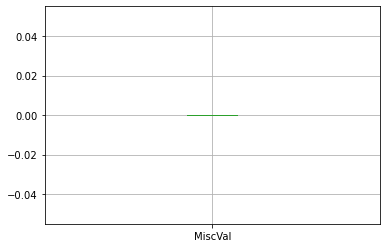

In [20]:
mv = df[ (df['MiscVal'] >= 50)].index  # considering values above 50 as an outlier 
df.drop(mv , inplace=True)


df.boxplot(column=['MiscVal']) 
df["MiscVal"].describe() 

count       697.000000
mean     163639.054247
std       37626.757763
min       35311.000000
25%      142500.000000
50%      172088.872700
75%      182381.322600
max      392000.000000
Name: SalePrice, dtype: float64

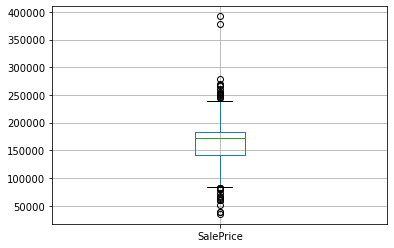

In [21]:
df.boxplot(column=['SalePrice']) 
df["SalePrice"].describe() 

In [22]:
#converting values of saleprice in range
SalePrice = df.SalePrice.round(-5)           #Rounding of values
df['SalePrice'] = df['SalePrice'].astype(int)

df.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,183583
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,144,0,0,1,2010,WD,Normal,150730
5,60,RL,75.0,10000,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,177150
7,60,RL,63.0,8402,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,175110
8,20,RL,85.0,10176,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,162011


# Data exploration 

In [23]:
pd.set_option('display.max_columns', None) 

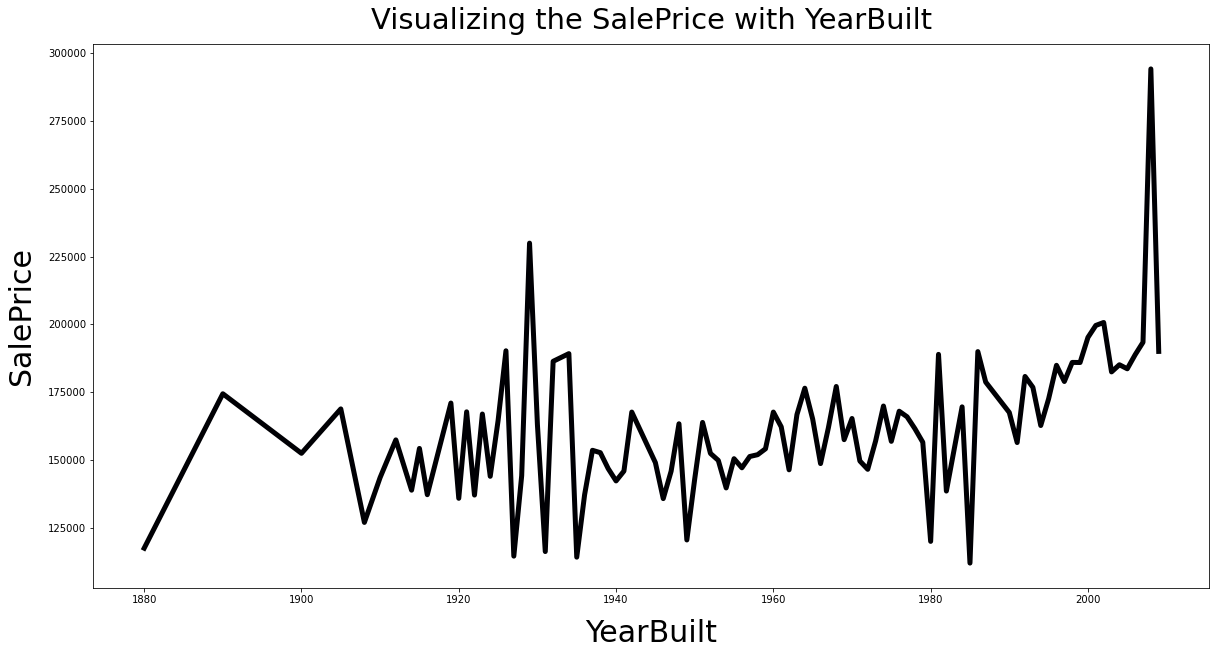

In [24]:
#1Visualizing the SalePrice with YearBuilt
df.groupby('YearBuilt')['SalePrice'].mean().plot(kind='line', figsize=(20, 10), colormap='inferno', linewidth = 5)

plt.ylabel('SalePrice', labelpad=12, size =30)
plt.xlabel("YearBuilt", labelpad=14, size =30)
plt.title("Visualizing the SalePrice with YearBuilt", pad=15, size =29);
plt.show()

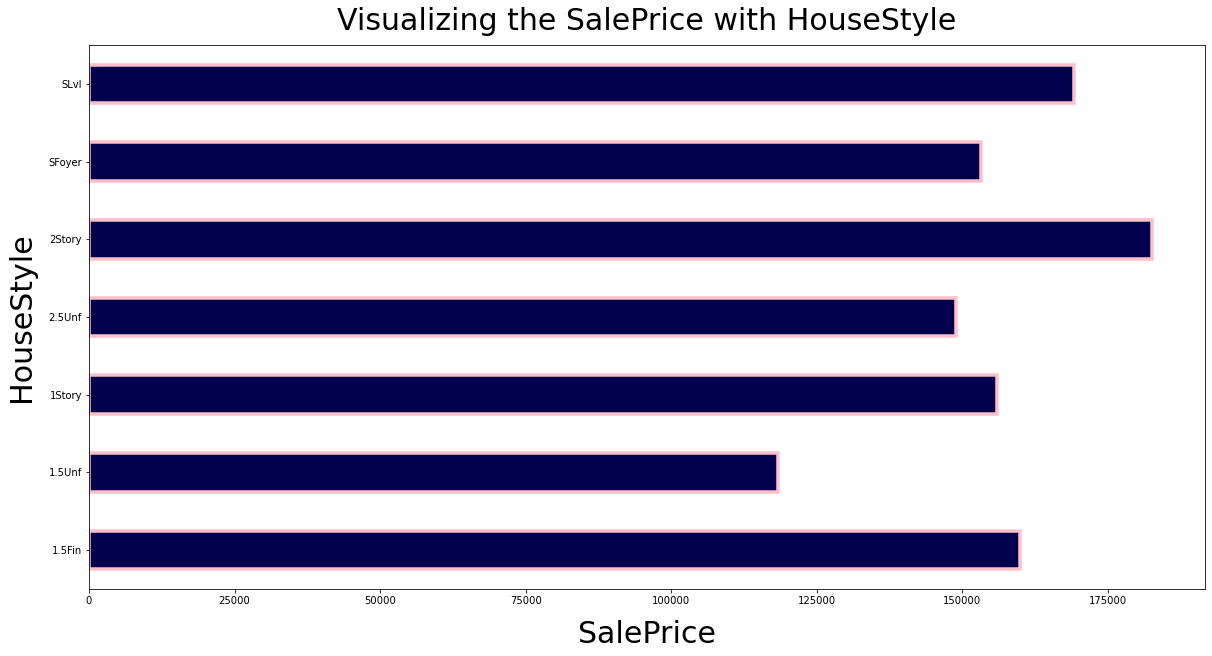

In [25]:
#2Visualizing the SalePrice with HouseStyle

df.groupby('HouseStyle')['SalePrice'].mean().plot(kind='barh', figsize=(20, 10), colormap='seismic', linewidth = 3.5, edgecolor = 'pink')
plt.ylabel('HouseStyle', labelpad=12, size =30)
plt.xlabel("SalePrice", labelpad=14, size =30)
plt.title("Visualizing the SalePrice with HouseStyle", pad=15, size =30);
plt.show()


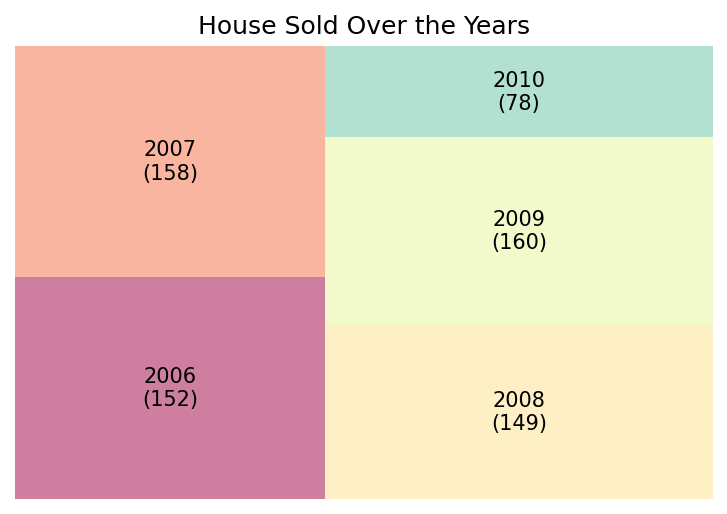

In [26]:
#3Tree Map for house sold over the years
import squarify 

YearSold = [df["YrSold"]]
headers = ["YrSold"]
YearSold = pd.concat(YearSold, axis=1, keys=headers)

YearSold = YearSold.groupby('YrSold').size().reset_index(name='count')
labels = YearSold.apply(lambda x: str(x[0]) + "\n(" + str(x[1])+")", axis=1)
sizes = YearSold['count'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(dpi= 150)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.5)

plt.title('House Sold Over the Years')
plt.axis('off')
plt.show()

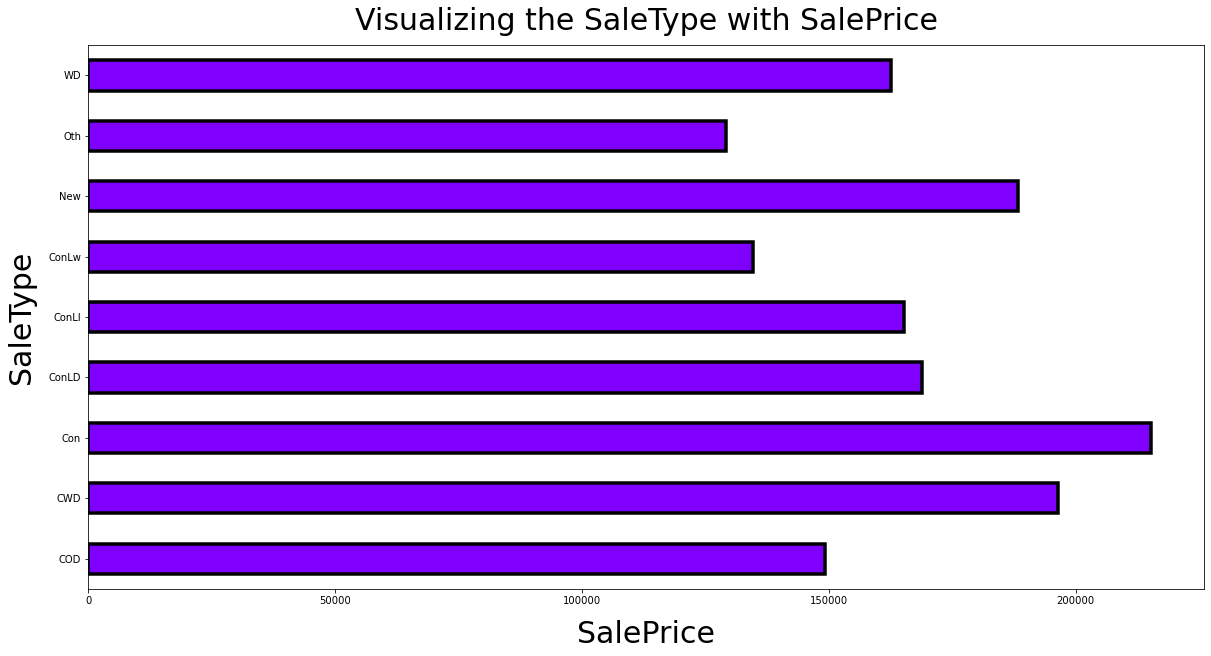

In [27]:
#4Visualizing the SalePrice with SaleType
df.groupby('SaleType')['SalePrice'].mean().plot(kind='barh', figsize=(20, 10), colormap='rainbow', linewidth = 3.5, edgecolor = 'black')
plt.ylabel('SaleType', labelpad=12, size =30)
plt.xlabel("SalePrice", labelpad=14, size =30)
plt.title("Visualizing the SaleType with SalePrice", pad=15, size =30);
plt.show()

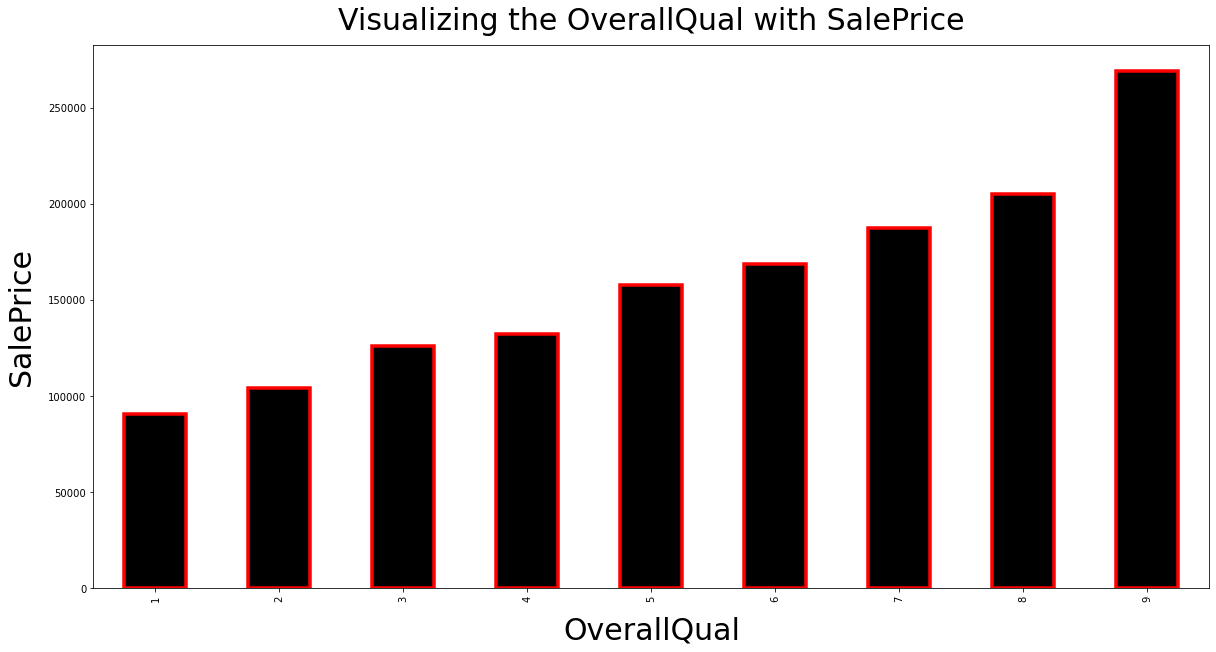

In [28]:
#5Visualizing the SalePrice with OverallQual

df.groupby('OverallQual')['SalePrice'].mean().plot(kind='bar', figsize=(20, 10), colormap='cubehelix', linewidth = 3.5, edgecolor = 'red')
plt.ylabel('SalePrice', labelpad=12, size =30)
plt.xlabel("OverallQual", labelpad=14, size =30)
plt.title("Visualizing the OverallQual with SalePrice", pad=15, size =30);
plt.show()

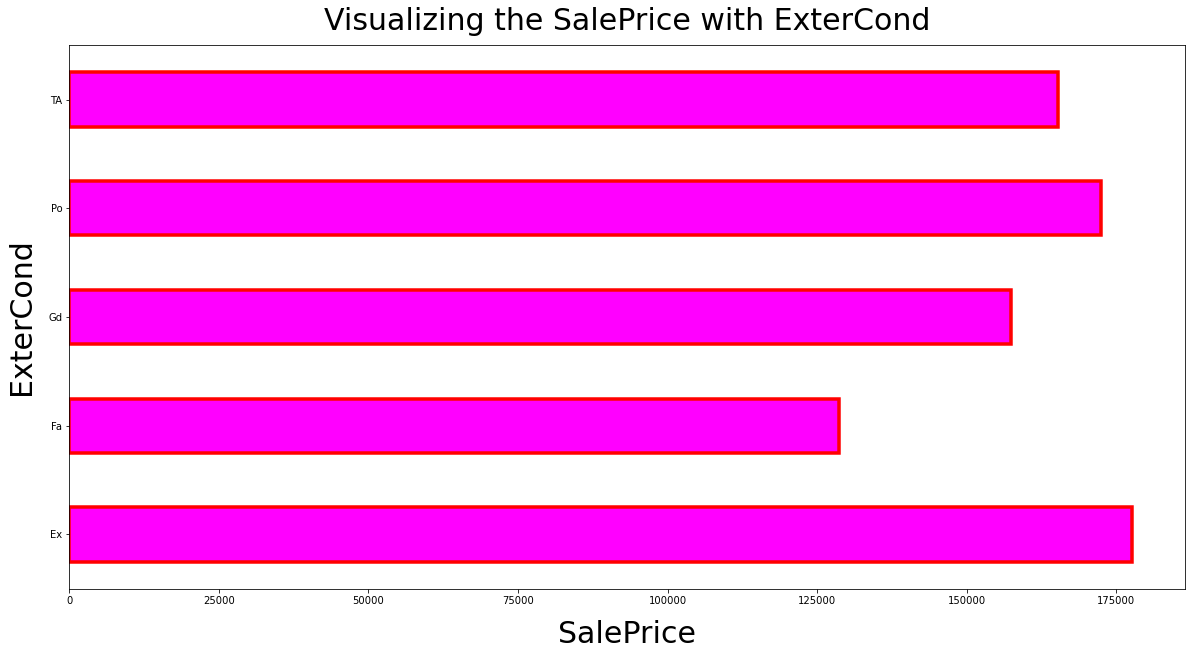

In [29]:
#6Visualizing the SalePrice with ExterCond

df.groupby('ExterCond')['SalePrice'].mean().plot(kind='barh', figsize=(20, 10), colormap='spring', linewidth = 3.5, edgecolor = 'red')
plt.ylabel('ExterCond', labelpad=12, size =30)
plt.xlabel("SalePrice", labelpad=14, size =30)
plt.title("Visualizing the SalePrice with ExterCond", pad=15, size =30);
plt.show()

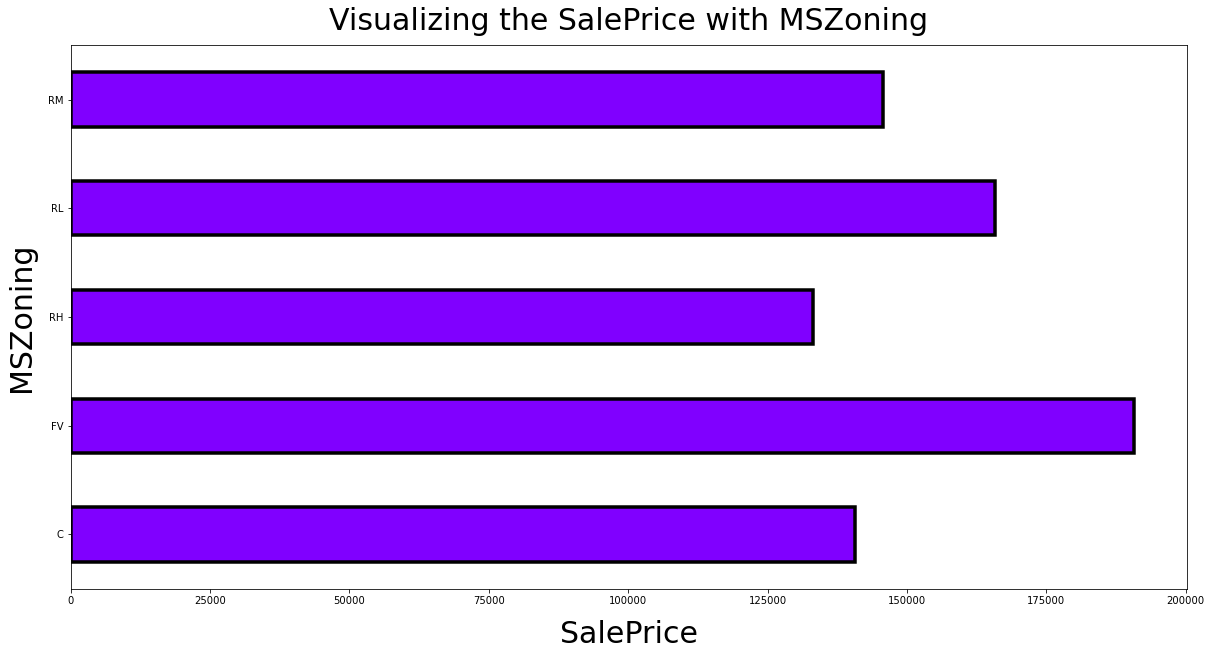

In [30]:
#7Visualizing the SalePrice with MSZoning

df.groupby('MSZoning')['SalePrice'].mean().plot(kind='barh', figsize=(20, 10), colormap='rainbow', linewidth = 3.5, edgecolor = 'black')
plt.ylabel('MSZoning', labelpad=12, size =30)
plt.xlabel("SalePrice", labelpad=14, size =30)
plt.title("Visualizing the SalePrice with MSZoning", pad=15, size =30);
plt.show()

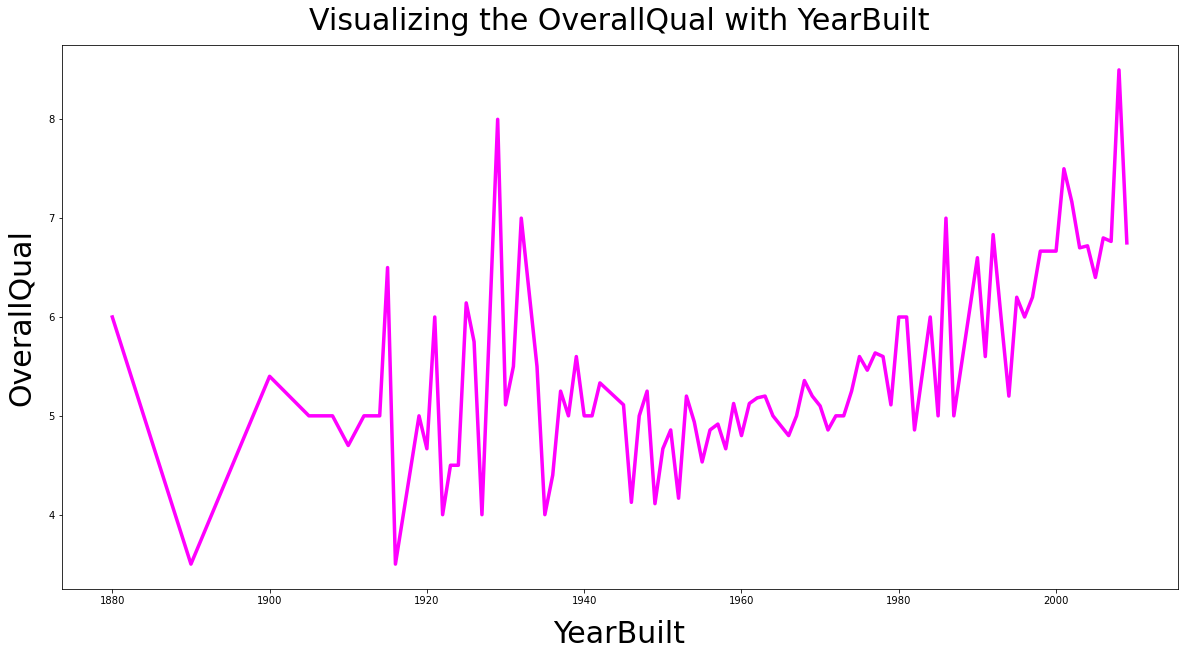

In [31]:
#8Visualizing the OverallQual with YearBuilt

df.groupby('YearBuilt')['OverallQual'].mean().plot(kind='line', figsize=(20, 10), colormap='spring', linewidth = 3.5)
plt.ylabel('OverallQual', labelpad=12, size =30)
plt.xlabel("YearBuilt", labelpad=14, size =30)
plt.title("Visualizing the OverallQual with YearBuilt", pad=15, size =30);
plt.show()

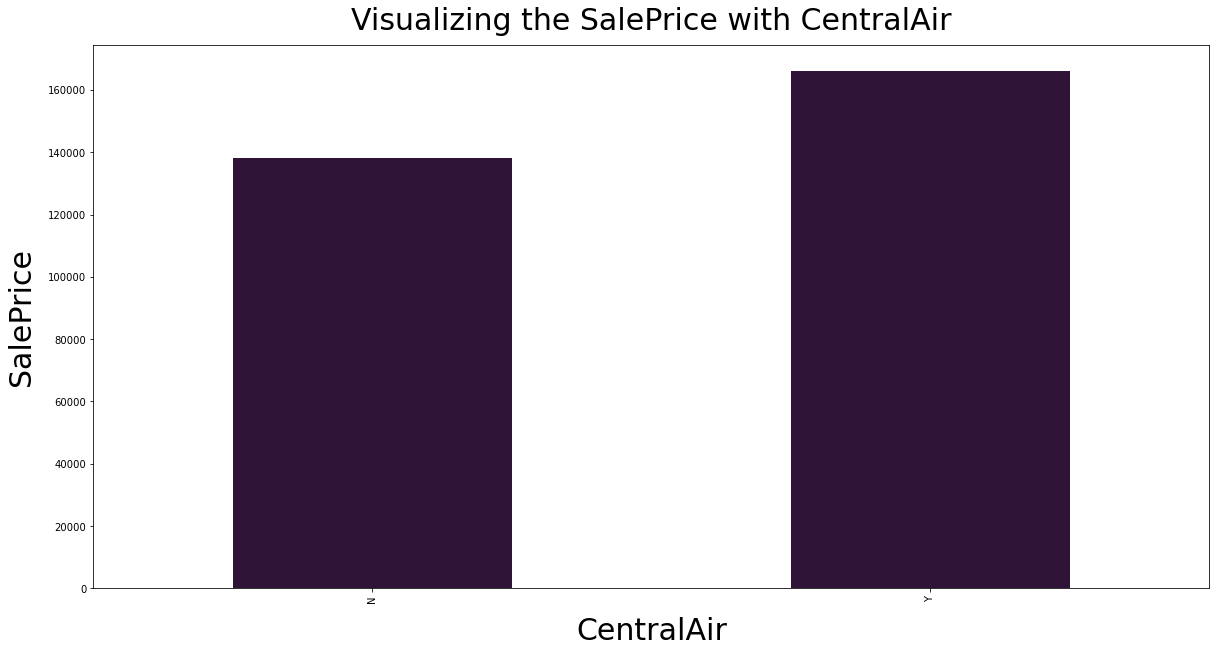

In [32]:
#9Visualizing the SalePrice with CentralAir

df.groupby('CentralAir')['SalePrice'].mean().plot(kind='bar', figsize=(20, 10), colormap='twilight_shifted', linewidth = 3.5)
plt.ylabel('SalePrice', labelpad=12, size =30)
plt.xlabel("CentralAir", labelpad=14, size =30)
plt.title("Visualizing the SalePrice with CentralAir", pad=15, size =30);
plt.show()

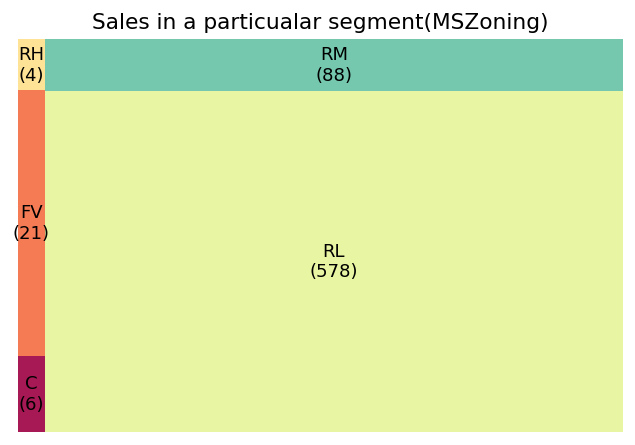

In [33]:
#Tree Map for MSZoning which general zoning classification of the sale
import squarify 
MSZoning = [df["MSZoning"]]
headers = ["MSZoning"]
MSZoning = pd.concat(MSZoning, axis=1, keys=headers)

MSZoning = MSZoning.groupby('MSZoning').size().reset_index(name='count')
labels = MSZoning.apply(lambda x: str(x[0]) + "\n(" + str(x[1])+")", axis=1)
sizes = MSZoning['count'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(dpi= 130)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.9)

plt.title('Sales in a particualar segment(MSZoning)')
plt.axis('off')
plt.show()

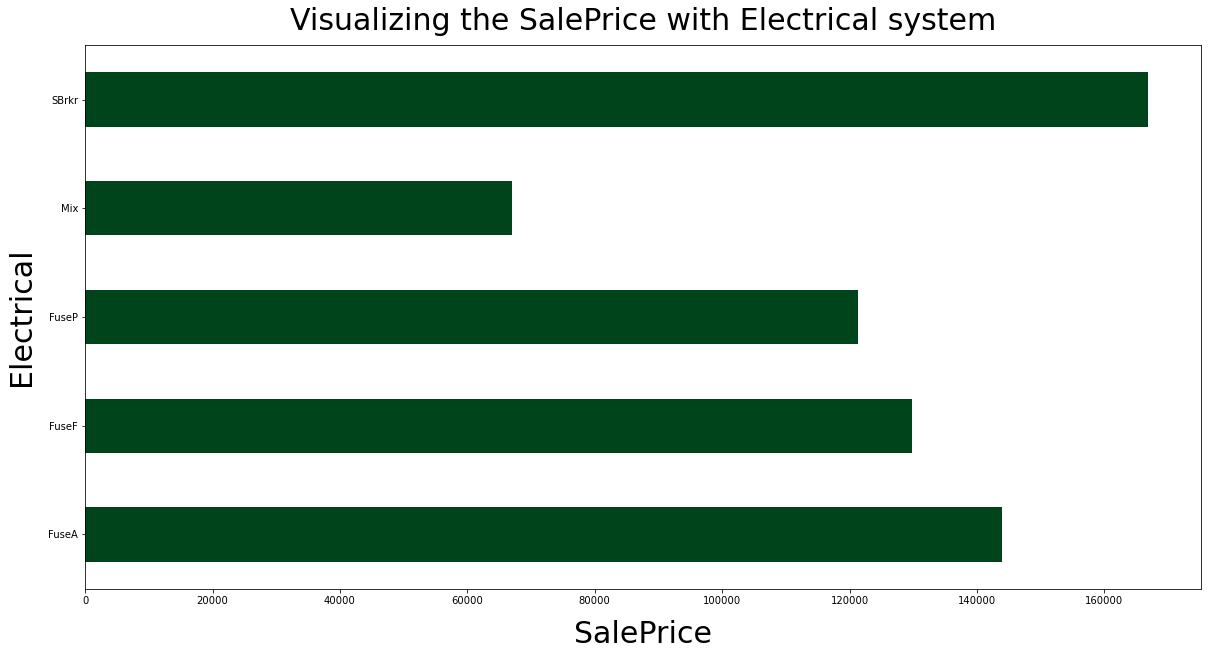

In [34]:
#11Visualizing the SalePrice with Electrical system

df.groupby('Electrical')['SalePrice'].mean().plot(kind='barh', figsize=(20, 10), colormap='Greens_r', linewidth = 3.5)
plt.ylabel('Electrical', labelpad=12, size =30)
plt.xlabel("SalePrice", labelpad=14, size =30)
plt.title("Visualizing the SalePrice with Electrical system", pad=15, size =30);
plt.show()

# Feature enginnering

In [35]:
#adding new features
df['TotalSF'] = (df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']) # new feature TotalSF
df['Total_BsmtFin'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'])  # new feature Total_sqr_footage
df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))   # new feature Total_Bathrooms
df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])      # new feature Total_porch_sf

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,Total_BsmtFin,Total_Bathrooms,Total_porch_sf
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,183583,2557.0,791.0,2.5,246
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Gd,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal,150730,2560.0,263.0,2.0,226
5,60,RL,75.0,10000,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,0,4,2010,WD,Normal,177150,2418.0,0.0,2.5,241
7,60,RL,63.0,8402,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,0,5,2010,WD,Normal,175110,2254.0,0.0,2.5,75
8,20,RL,85.0,10176,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,0,2,2010,WD,Normal,162011,2641.0,637.0,2.5,192


In [36]:
#dropping unnecssary features after feature enginnering
df = df.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2' , '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF'], axis=1)
df.shape

(697, 66)

In [37]:
df.dtypes

MSSubClass           int64
MSZoning            object
LotFrontage        float64
LotArea              int64
Street              object
LotShape            object
LandContour         object
Utilities           object
LotConfig           object
LandSlope           object
Neighborhood        object
Condition1          object
Condition2          object
BldgType            object
HouseStyle          object
OverallQual          int64
OverallCond          int64
YearBuilt            int64
YearRemodAdd         int64
RoofStyle           object
RoofMatl            object
Exterior1st         object
Exterior2nd         object
MasVnrType          object
MasVnrArea         float64
ExterQual           object
ExterCond           object
Foundation          object
BsmtQual            object
BsmtCond            object
BsmtExposure        object
BsmtFinType1        object
BsmtFinType2        object
BsmtUnfSF          float64
Heating             object
HeatingQC           object
CentralAir          object
E

# Label Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_non_numeric = df.select_dtypes(exclude=[np.number])  #printing all categorical columns
non_numeric_cols = df_non_numeric.columns.values
non_numeric_cols

for column in non_numeric_cols:
    df[column] = LabelEncoder().fit_transform(df[column])

# Feature selection based on correlation

In [39]:
x = df.loc[:, df.columns != 'SalePrice']
Y = df.loc[:, df.columns == 'SalePrice']
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        a=abs(correlation_matrix.iloc[i, j]) 
        if (a > 0.47 and a < 0.53): 
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
len(correlated_features)
print(correlated_features)


{'Total_Bathrooms', 'GarageFinish', 'YearBuilt', 'KitchenAbvGr', 'GarageYrBlt', 'YearRemodAdd'}


# Data Modelling

In [40]:
#Splitting data
X = df[['YearBuilt', 'GarageYrBlt', 'KitchenAbvGr', 'Total_Bathrooms', 'YearRemodAdd', 'GarageFinish']]
y = df['SalePrice']
import sklearn
from sklearn.model_selection import train_test_split as tts

#Suite1: 70% for training and 30% for testing
X_train,X_test,y_train,y_test= tts(X,y,test_size=0.3,random_state=0)
len(X_test)


210

# Linear Regression

Intercept: -457836.0026296855
Slope: [  183.98342321    19.14412075  2333.29909538  8751.57522537
   107.00422244 -7714.12864257]
Mean Absolute Error: 27346.67619047619
Mean Squared Error: 276156796.24761903
Root Mean Squared Error: 16617.966068313504
200000
160000
190000
160000
160000
160000
150000
140000
190000
160000
150000


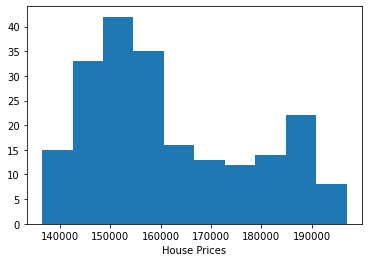

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression()  
model.fit(X_train,y_train) #fitting the model

#For retrieving the intercept:
print('Intercept:', model.intercept_)

#For retrieving the slope:
print('Slope:',model.coef_)

y_pred = model.predict(X_test) #predic the target
plt.hist(y_pred)
plt.xlabel('House Prices')


prediction = y_pred
prediction = prediction.astype(int)   #converting predictive float values to integer

#Evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


prediction = y_pred.round(-4)           #Rounding of values
prediction = prediction.astype(int)   #converting predictive float values to integer
predictions = prediction
for i in range(0, len(predictions)):
    prediction = predictions[i]
    print(prediction)
    if i == 10:
        break

# lasso Regression

Intercept: -457905.37918196287
Slope: [  184.00372764    19.18059988  2318.87400454  8751.09435296
   106.98918099 -7711.38063915]
Mean Absolute Error: 27346.281520362216
Mean Squared Error: 1421448343.926002
Root Mean Squared Error: 37702.09999358129
200000
160000
190000
160000
160000
160000
150000
140000
190000
160000
150000


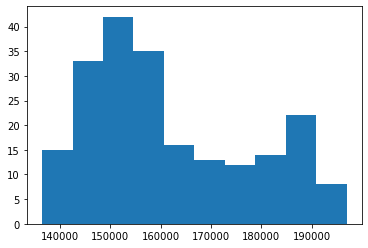

In [42]:
from sklearn.linear_model import Lasso

Model = Lasso(alpha=1.0)
Model.fit(X_train,y_train) #fitting the model

#For retrieving the intercept:
print('Intercept:', Model.intercept_)

#For retrieving the slope:
print('Slope:',Model.coef_)

ypred = Model.predict(X_test) #predic target

prediction1 = ypred 
plt.hist(prediction1)

#Evaluation of Lasso
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction1)))



prediction1 = prediction1.round(-4)           #Rounding of values
prediction1 = prediction1.astype(int)   #converting predictive float values to intege
predictions1 = prediction1
for i in range(0, len(predictions1)):
    prediction = predictions1[i]
    
    print(prediction)
    if i == 10:
        break


In [43]:
predictions

array([200000, 160000, 190000, 160000, 160000, 160000, 150000, 140000,
       190000, 160000, 150000, 140000, 150000, 150000, 140000, 190000,
       170000, 190000, 150000, 160000, 180000, 190000, 200000, 150000,
       160000, 170000, 150000, 150000, 150000, 160000, 150000, 190000,
       180000, 180000, 140000, 150000, 150000, 160000, 140000, 140000,
       180000, 160000, 170000, 160000, 190000, 150000, 190000, 180000,
       160000, 180000, 160000, 140000, 180000, 160000, 140000, 150000,
       160000, 180000, 150000, 140000, 160000, 180000, 160000, 150000,
       160000, 140000, 170000, 150000, 180000, 160000, 160000, 150000,
       140000, 140000, 190000, 180000, 140000, 150000, 140000, 150000,
       160000, 180000, 190000, 180000, 170000, 180000, 190000, 190000,
       160000, 160000, 170000, 180000, 170000, 170000, 160000, 160000,
       150000, 160000, 190000, 140000, 190000, 160000, 180000, 150000,
       170000, 190000, 150000, 150000, 160000, 150000, 150000, 150000,
      